# Differential Equations

## Motivation

Very often, the laws that describe the empirically observed behavior of physical systems such as those designed by engineers are expressed in terms of change to the state of those systems. If we want to be able to predict the state of a system at a point in time or space, we will need to be able to go from those equations describing change to equations describing state. That is what solving a differential equation consists of. 

When we can't arrive to an analytical solution, we can use one of the many methods to solve differential equations numerically.

## Background

A differential equation describes the change of a variable with respect to another.

The solution to that differential equation is a function that connects the original variables and respects the original differential equation. It can be reached by integrating the original equation. However, as with all the other techniques in this course, it is not always analytically possible to integrate a differential equation.

Note that there are always infinitely many equations that satisfy an initial differential equation, whose only difference is a constant. This is called the _constant of integration_. The only way to choose between them is to have, in addition to the differential equation, an auxiliary condition, often an _initial condition_.

Think of the falling parachutist. We can derive an expression for the change of velocity with respect to time that depends on the current velocity. If we integrate that, we will have an expression of velocity that depends only on time. But we don't know the velocity at time t _unless we know the initial velocity.

## The falling parachutist

$$\frac{d v}{dt} = \frac{mg -cv}{m} $$



### Analytical solution

$$v(t) = \frac{gm}{c} (1 - e^{-(c/m)t})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = 66
v_0 = 0 
g = 9.8
c = 20
t = 5

v_t5 = g * m / c * (1 - np.exp(-t * c / m) )

v_t5

25.2324802805378

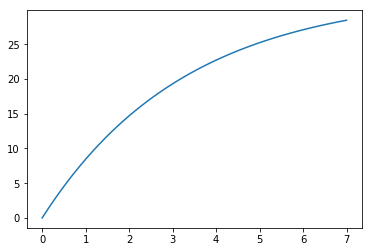

In [2]:
def v_analytical(time):
    
    return (g * m / c) * (1 - np.exp(-time * c / m) )

ts_a = np.linspace(0,7)
vs_a = v_analytical(ts_a)

plt.plot(ts_a, vs_a);

### Euler's method

Finite differences:

$$\frac{dv}{dt} \approx \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}) - v(t_i)}{t_{i+1}- t_i} $$

Which can be rearranged like this:

$$ v(t_{i+1} ) = v(t_i ) + \left[g − \frac{c}{m} v(t_i)\right] (t_{i+1} − t_i )$$

In [3]:
v_0 = 0
t_0 = 0
timedelta = 1

t_1 = t_0 + timedelta
v_1 = v_0 + (g - (c / m) * v_0) * (t_1 - t_0)
v_1

9.8

If we do it several times in succession and plot it:

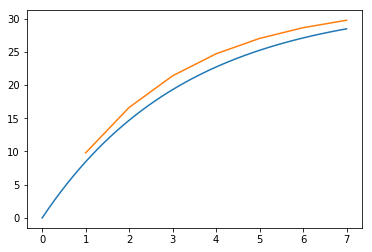

In [4]:
v_0 = 0
t_0 = 0
timedelta = 1
vs_n = []
ts_n = np.arange(0, 7, timedelta)

for t in ts_n:
    t_1 = t_0 + timedelta
    v_1 = v_0 + (g - (c / m) * v_0) * (t_1 - t_0)
    
    v_0 = v_1
    vs_n.append(v_0)

plt.plot(ts_a, vs_a)
plt.plot(ts_n +timedelta, vs_n);

If we increase the number of steps, we get improved precision at the cost of computing power.

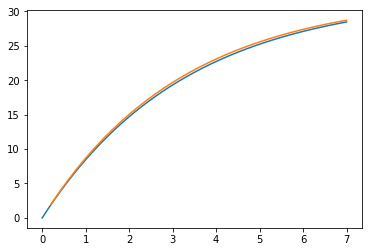

In [5]:
v_0 = 0
t_0 = 0
timedelta = .2
vs_n = []
ts_n = np.arange(0, 7, timedelta)

for t in ts_n:
    t_1 = t_0 + timedelta
    v_1 = v_0 + (g - (c / m) * v_0) * (t_1 - t_0)
    
    v_0 = v_1
    vs_n.append(v_0)

plt.plot(ts_a, vs_a)
plt.plot(ts_n +timedelta, vs_n);

#### Example

Exponential population growth. We don't know the actual population at time t unless we know the population at time 0.

$$\frac{dN}{dt} = r N$$

$$\int_{N_0}^N \frac{N}{N_0} = \int_0^t r dt$$

$$ln \left( \frac{N}{N_0}\right) = r t$$

Population at time t:

$$N(t) = N_0 \cdot e^{rt}$$

# Runge-Kutta Methods

What is it that we are trying to do? Essentially, reconstructing a trajectory from changes in position.

We have an equation that gives us slopes ($\phi$), that is, instantaneous changes:

$$\phi = \frac{dy}{dx} = f(x,y)$$

So if we know where we are, and we know where we are heading, how do we know where we'll be?



## Euler's Method

Follow the trajectory step by step:

$$y_{y+1} = y_i + \phi h = y_i + f(x_i,y_i)h$$

where h = step size.

### Example

Use Euler's method to integrate numerically:

$$\frac{dy}{dx} = -2x^3 + 12x^2 - 20x +8.5$$

from x=0 to x=4 with a step size of $h=0.5$. Initial condition is y(0) = 1.

Solve analytically, compare.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def differential(x):
    return -2 * x **3 + 12 * x **2 - 20 * x + 8.5

# Analytical solution
def integral(x):
    return (-2/4) * x ** 4 + (12/3) * x ** 3 - (20/2) * x ** 2 + 8.5*x + 1

integral(0)

1.0

In [7]:
# numerical solution
x = 0
y = 1
h = 0.5
result = []

while x <= 4:
    result.append((x,y))
    y += differential(x) * h
    x += h
    
xs, ys = zip(*result)

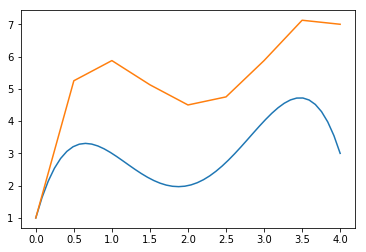

In [8]:
lp = np.linspace(0, 4)

plt.plot(lp, integral(lp))
plt.plot(xs, ys);

We have a big deviation. We can ameliorate that with a smaller step size:

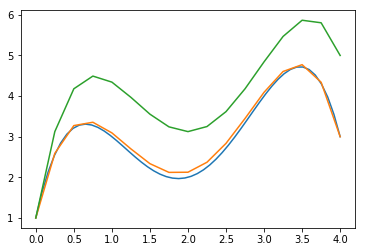

In [19]:
# smaller step size
x = 0
y = 1
h = 0.25
result = []

while x <= 4:
    result.append((x,y))
    y += differential(x) * h
    x += h
    
xs_2, ys_2 = zip(*result)

plt.plot(lp, integral(lp))
plt.plot(xs, ys)
plt.plot(xs_2, ys_2);

## Improvements to Euler's Method

One obvious problem is that we are updating our measure of the slope too infrequently.

### Heun's Method

We could, for example, take the slope at the beginning and the end of the segment rather than only at the beginning.

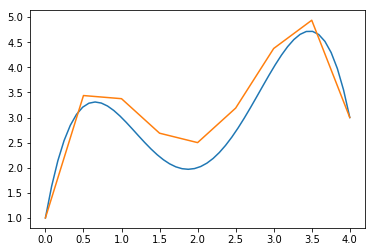

In [10]:
# numerical solution
x = 0
y = 1
h = 0.5
result = []

while x <= 4:
    result.append((x,y))
    y += (differential(x) + differential(x+h)) / 2 * h
    x += h
    
xs, ys = zip(*result)

plt.plot(lp, integral(lp))
plt.plot(xs, ys);

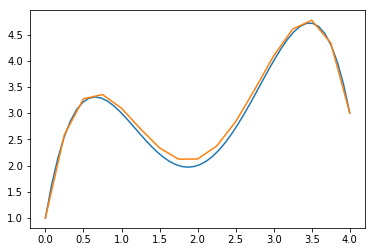

In [11]:
# numerical solution
x = 0
y = 1
h = 0.25
result = []

while x <= 4:
    result.append((x,y))
    y += (differential(x) + differential(x+h)) / 2 * h
    x += h
    
xs, ys = zip(*result)

plt.plot(lp, integral(lp))
plt.plot(xs, ys);

#### Exercise

Use Heun's method to integrate numerically

$$y' = 4e^{0.8x} - 0.5y$$

from $x=0$ to $x=4$ with a step size of 1. Initial condition is $x=0$, $y=2$.

In [12]:
# todo

### The midpoint method

We make an _intermediate prediction_ of the slope at the middle of the interval. Can we make an intermediate prediction of the value of the solution function?

Why, yes we can. That's what's called the Midpoint Method.


$$y_{i+1/2} = f(x_i, y_i)\frac{h}{2}$$

$$y_{y+1} =y_i + f(x_{i+1/2},y_{i+1/2})h$$

This method only represents an improvement if the value of the slope depends on y itself.

#### Exercise

Use the Midpoint method to integrate numerically

$$y' = 4e^{0.8x} - 0.5y$$

from $x=0$ to $x=4$ with a step size of 1. Initial condition is $x=0$, $y=2$.

In [13]:
# TODO

## Runge-Kutta methods

Euler's, Heun's, and the midpoint method are all particular cases of _Runge-Kutta methods_. In Runge-Kutta methods, we update our estimate of y with $\phi(x_i, y_i, h)$, an _increment function_:

$$y_{y+1} = y_i + \phi(x_i, y_i, h) h$$


# Problems

#### Exercise

If water is drained from a vertical cylindrical tank by opening a valve at the base, the water will flow fast when the tank is full and slow down as it continues to drain. As it turns out, the rate at
which the water level drops is:

$$ \frac{dy}{dt} = -k \sqrt y$$

where k is a constant depending on the shape of the hole and the cross-sectional area of the tank and drain hole. The depth of the water y is measured in meters and the time t in minutes. If k = 0.06, determine how long it takes the tank to drain if the fluid level is initially 3 m. Solve by applying Euler’s method. Use a step of 0.5 minutes.

#### Exercise

Assuming that drag is proportional to the square of velocity,
we can model the velocity of a falling object like a parachutist with
the following differential equation:

$$\frac{d v}{dt} = g - \frac{c_d}{m}v^2 $$

where v is velocity (m/s), t = time (s), g is the acceleration due to
gravity (9.81 m/s 2 ), $c_d$ = a second-order drag coefficient (kg/m),
and m = mass (kg). Solve for the velocity and distance fallen by a
90-kg object with a drag coefficient of 0.225 kg/m. If the initial
height is 1 km, determine when it hits the ground. Obtain your so-
lution with (a) Euler’s method and (b) Heun's method

#### Exercise

The population growth model listed above is called the _exponential_ or _Malthusian_ model. In the real world, populations do not grow exponentially forever because there are resources (nutrients, space) that constrain the maximum possible population.

The _logistic_ model incorporates these constraints in the form of a constant $p_{max}$, the maximum population possible. This parameter is also often known as K, the carrying capacity. The logistic model can be expressed as:

$$ \frac{dp}{dt} = r_{gm}(1 - \frac{1 - p}{p_{max}})p$$

where p = population, $r_{gm}$ = the maximum growth rate under unlimited conditions, and $p_{max}$ = the carrying capacity. Simulate the world’s population from 1950 to 2000 using one of the numerical
methods described in this section. Employ the following initial conditions and parameter values for your simulation: $p_0$ (in 1950) = 2555 million people, $r_{gm}$ = 0.026/yr, and $p_max$ = 12,000 million
people. Plot your simulation and the following actual data, and compare:

```
t |  1950  1960  1970  1980  1990  2000
p |  2555  3040  3708  4454  5276  6079
```